In [2]:
# Importación de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
#Cargar el dataset
df = pd.read_csv('bank.csv')

# 1. Análisis exploratorio de los datos

In [4]:
#Visualización de los primeros registros de la base de datos
print("Primeras 5 filas del dataset:")
print(df.head())

#Tipo de variables
print("\nInformación del dataset:")
print(df.info())

#Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())

Primeras 5 filas del dataset:
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 

<Figure size 1200x800 with 0 Axes>

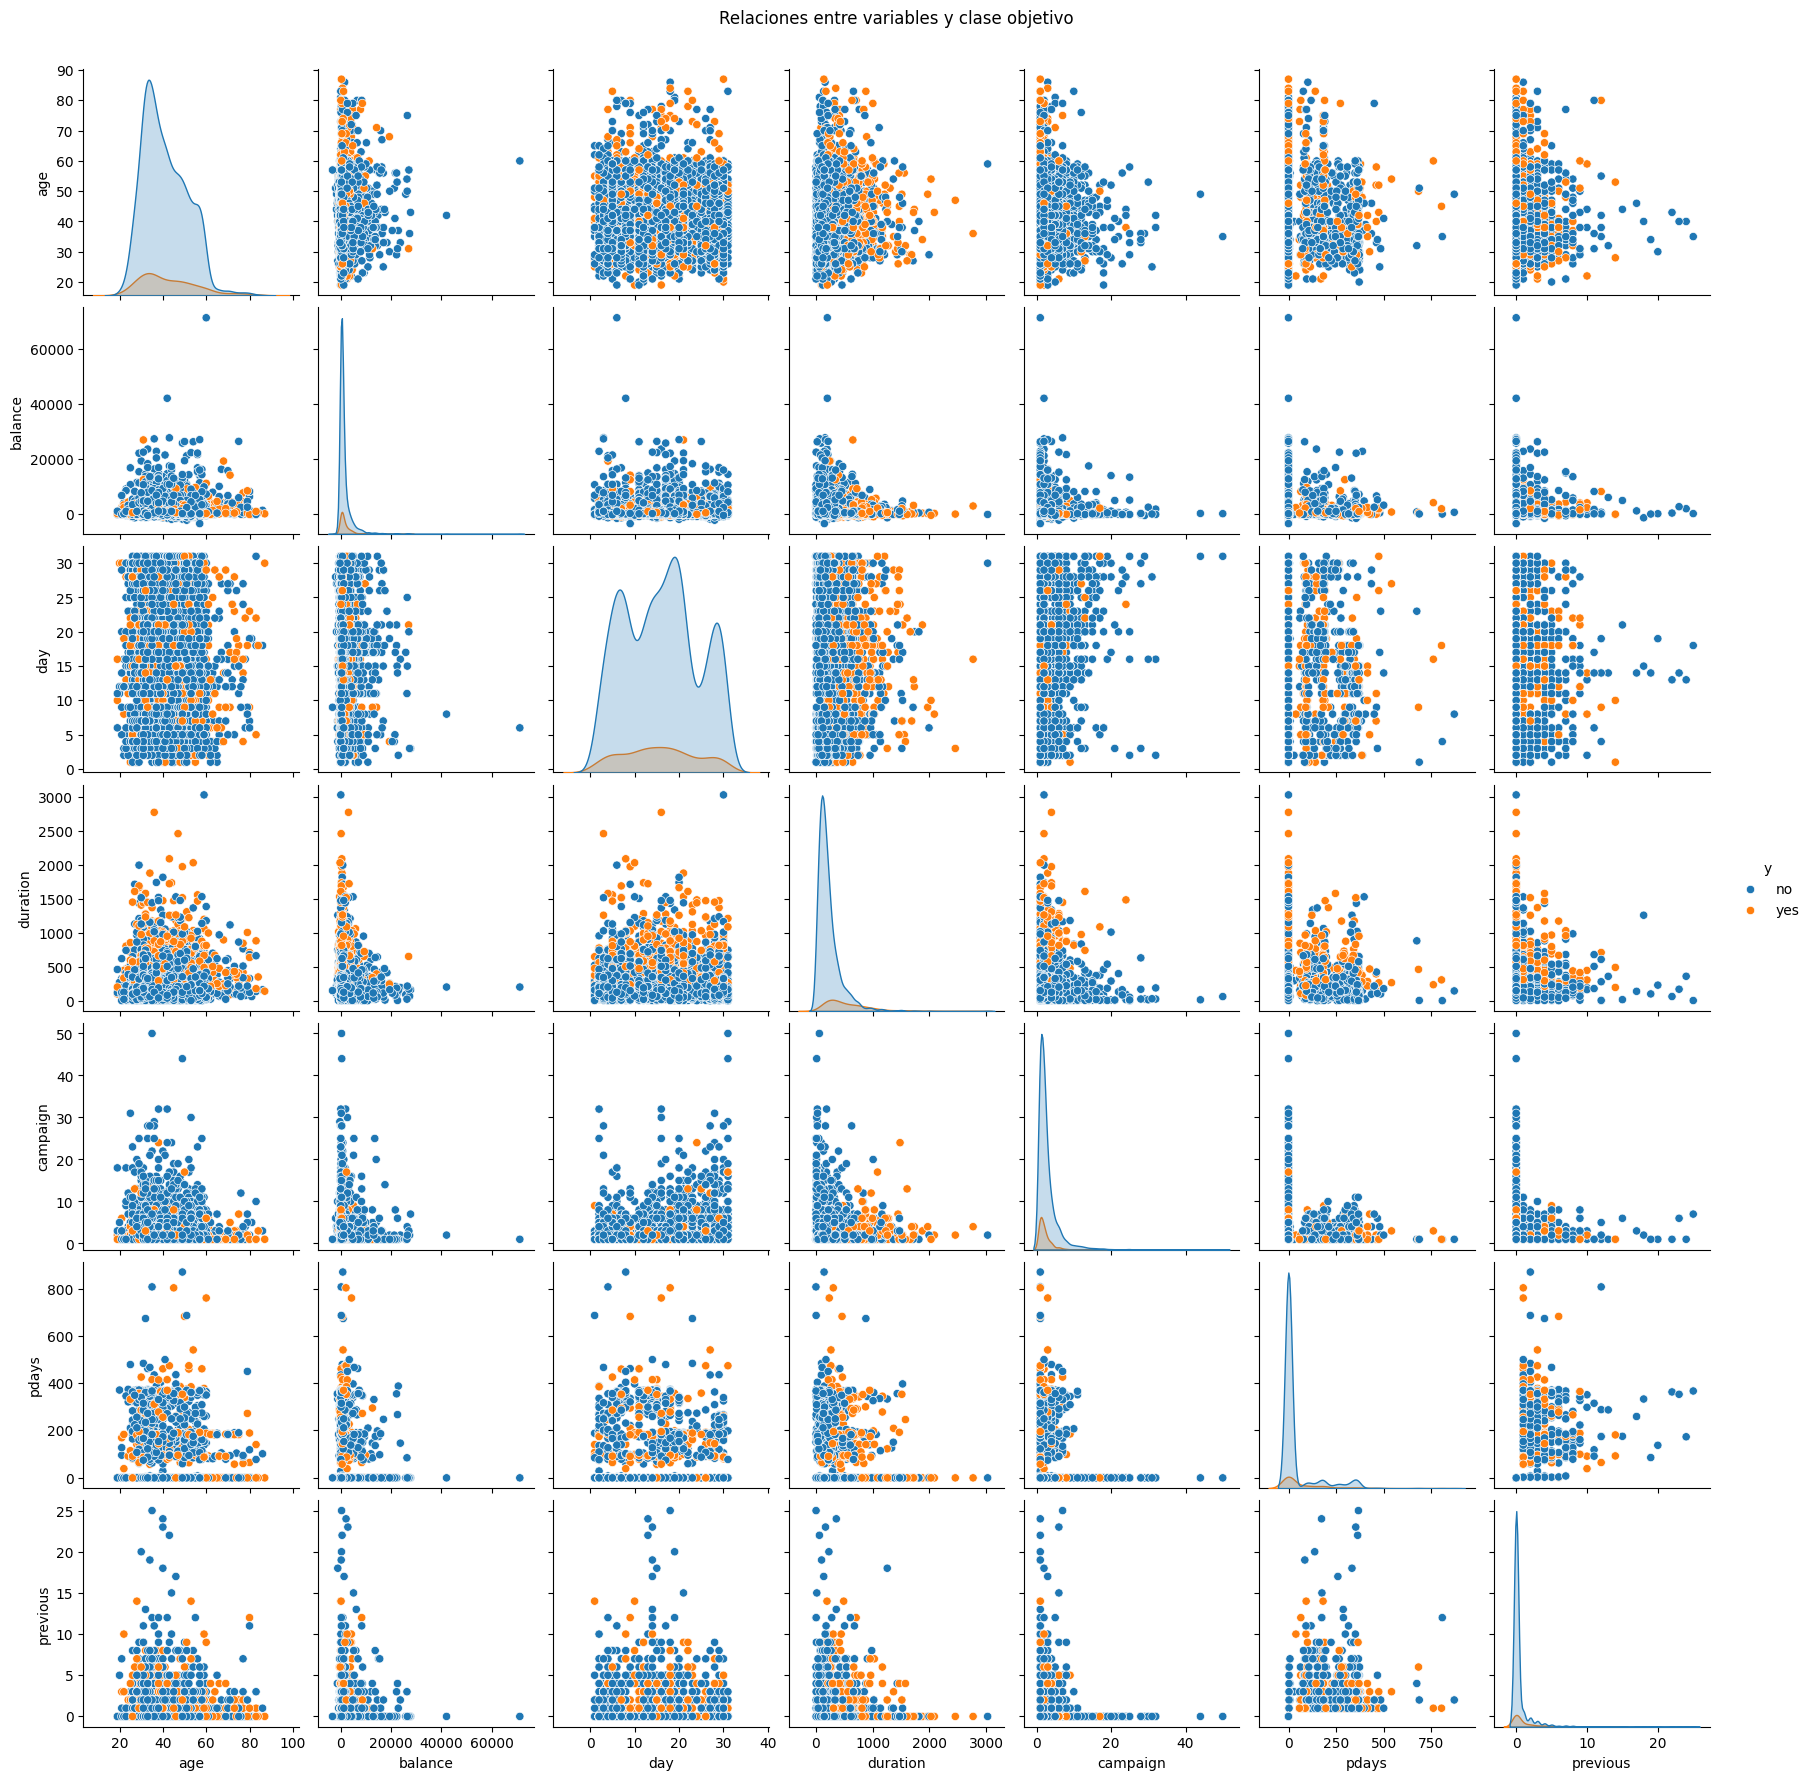

In [5]:
# Visualización de correlaciones
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='y')
plt.suptitle('Relaciones entre variables y clase objetivo', y=1.02)
plt.savefig('pairplot.png')  # Guardar figura para referencia
plt.show()

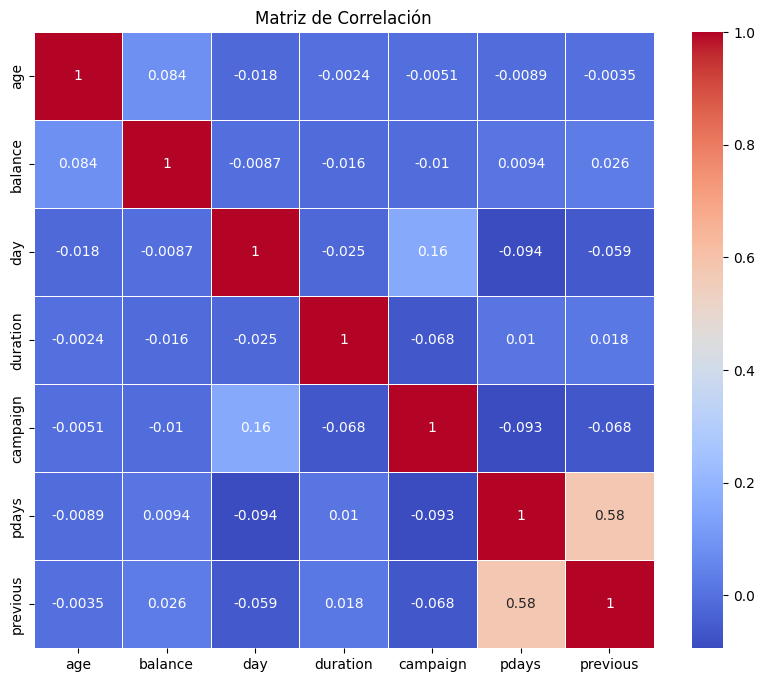

In [6]:
# Matriz de correlación
plt.figure(figsize=(10, 8))
# Seleccionar columnas numéricas
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.savefig('correlation_matrix.png')
plt.show()

# 2. Preprocesamiento

In [7]:
# Preprocesamiento
# Eliminamos columnas que no vamos a utilizar
df = df.drop(['job', 'contact', 'day', 'month','previous', 'poutcome'], axis=1)

#Cambiamos las variables binarias para poder analizarlas
df['default'] = df['default'].map({'yes': 1, 'no': 0})
df['housing'] = df['housing'].map({'yes': 1, 'no': 0})
df['loan'] = df['loan'].map({'yes': 1, 'no': 0})
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [8]:
#Verificamos los cambios realizados
print("Primeras 5 filas del dataset:")
print(df.head())

print("\nInformación del dataset:")
print(df.info())

Primeras 5 filas del dataset:
   age  marital  education  default  balance  housing  loan  duration  \
0   30  married    primary        0     1787        0     0        79   
1   33  married  secondary        0     4789        1     1       220   
2   35   single   tertiary        0     1350        1     0       185   
3   30  married   tertiary        0     1476        1     1       199   
4   59  married  secondary        0        0        1     0       226   

   campaign  pdays  y  
0         1     -1  0  
1         1    339  0  
2         1    330  0  
3         4     -1  0  
4         1     -1  0  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   marital    4521 non-null   object
 2   education  4521 non-null   object
 3   default    4521 non-null   int64 
 4   balance    4521

In [9]:
#Establecemos las variables que vamos a utilizar
X = df[['age','default','balance','housing','loan','duration','campaign','pdays']]
y = df['y']

In [10]:
# Escalado de variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (3616, 8)
Tamaño del conjunto de prueba: (905, 8)


# 3. Implementación de los modelos

## 3.1 Árbol de Decisión


MODELO 1: ÁRBOL DE DECISIÓN

Matriz de Confusión (Árbol de Decisión):
[[783  24]
 [ 68  30]]


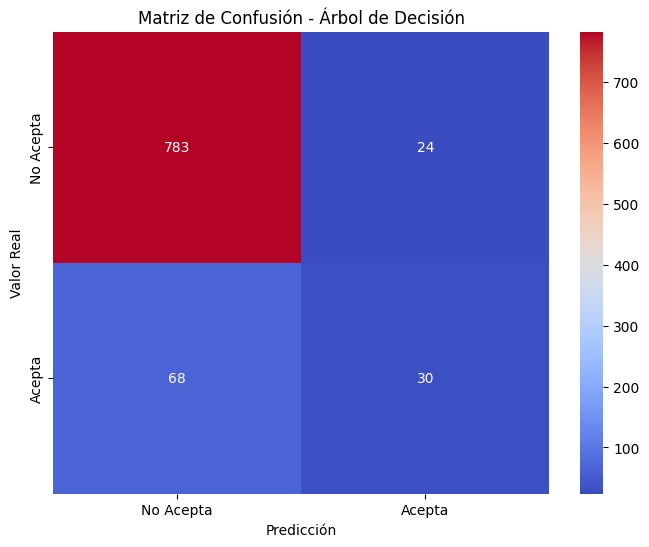


Reporte de Clasificación (Árbol de Decisión):
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       807
           1       0.56      0.31      0.39        98

    accuracy                           0.90       905
   macro avg       0.74      0.64      0.67       905
weighted avg       0.88      0.90      0.88       905



In [11]:
# 3.1 Implementación de Árbol de Decisión
print("\n" + "="*50)
print("MODELO 1: ÁRBOL DE DECISIÓN")
print("="*50)

# Entrenamiento del modelo
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

# Predicciones
y_pred_tree = tree.predict(X_test)

# Evaluación
print("\nMatriz de Confusión (Árbol de Decisión):")
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print(conf_matrix_tree)

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=['No Acepta', 'Acepta'],
            yticklabels=['No Acepta', 'Acepta'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.savefig('confusion_matrix_tree.png')
plt.show()

print("\nReporte de Clasificación (Árbol de Decisión):")
print(classification_report(y_test, y_pred_tree))

## 3.2 SVM


MODELO 2: SUPPORT VECTOR MACHINE (SVM)

Matriz de Confusión (SVM):
[[790  17]
 [ 74  24]]


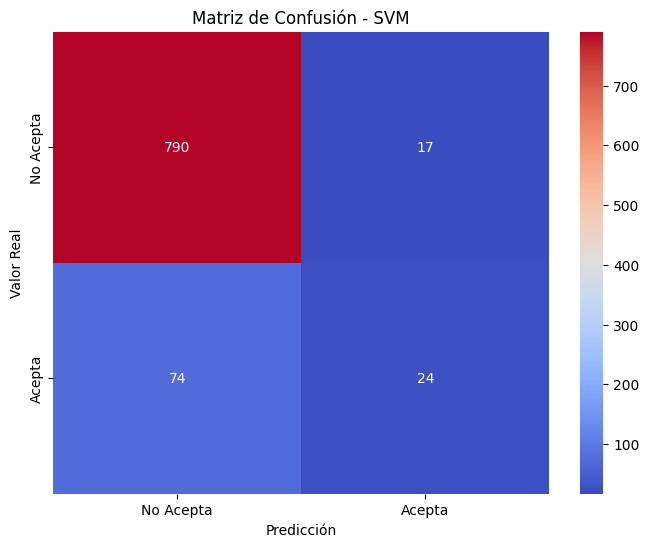


Reporte de Clasificación (SVM):
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       807
           1       0.59      0.24      0.35        98

    accuracy                           0.90       905
   macro avg       0.75      0.61      0.65       905
weighted avg       0.88      0.90      0.88       905



In [13]:
# 3.2 Implementación de SVM (Support Vector Machine)
print("\n" + "="*50)
print("MODELO 2: SUPPORT VECTOR MACHINE (SVM)")
print("="*50)

# Entrenamiento del modelo
svm = SVC(kernel='rbf', C=10, gamma='scale', random_state=42)
svm.fit(X_train, y_train)

# Predicciones
y_pred_svm = svm.predict(X_test)

# Evaluación
print("\nMatriz de Confusión (SVM):")
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print(conf_matrix_svm)

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=['No Acepta', 'Acepta'],
            yticklabels=['No Acepta', 'Acepta'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - SVM')
plt.savefig('confusion_matrix_svm.png')
plt.show()

print("\nReporte de Clasificación (SVM):")
print(classification_report(y_test, y_pred_svm))

##3.3 Random Forest


MODELO 3: RANDOM FOREST

Matriz de Confusión (Random Forest):
[[780  27]
 [ 75  23]]


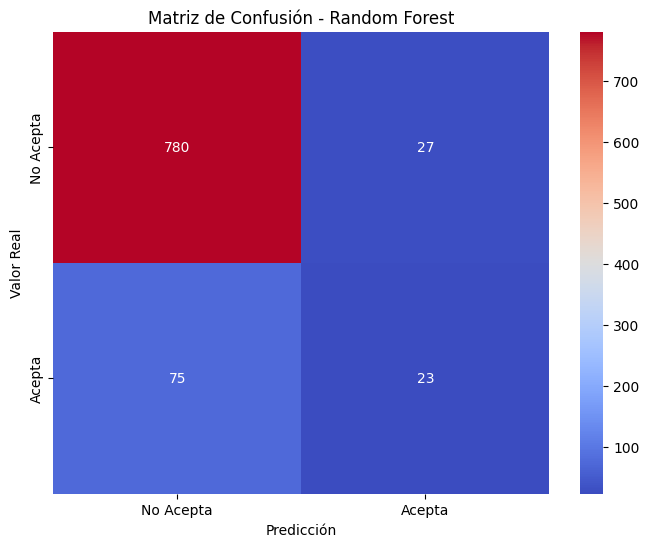


Reporte de Clasificación (Random Forest):
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       807
           1       0.46      0.23      0.31        98

    accuracy                           0.89       905
   macro avg       0.69      0.60      0.62       905
weighted avg       0.86      0.89      0.87       905



In [14]:
# 3.3 Implementación de Random Forest
print("\n" + "="*50)
print("MODELO 3: RANDOM FOREST")
print("="*50)

# Entrenamiento del modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf_model.predict(X_test)

# Evaluación
print("\nMatriz de Confusión (Random Forest):")
conf_matrix_tree = confusion_matrix(y_test, y_pred_rf)
print(conf_matrix_tree)

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=['No Acepta', 'Acepta'],
            yticklabels=['No Acepta', 'Acepta'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Random Forest')
plt.savefig('confusion_matrix_rf.png')
plt.show()

print("\nReporte de Clasificación (Random Forest):")
print(classification_report(y_test, y_pred_rf))

#4. Comparación de rendimiento


COMPARACIÓN DE MODELOS

Resumen de validación cruzada:
              Modelo  Accuracy Promedio  Desviación Estándar
0  Árbol de Decisión           0.883434             0.006337
1                SVM           0.888963             0.004663
2      Random Forest           0.882105             0.005278


<ipython-input-15-a2144f13e010>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelo', y='Accuracy Promedio', data=cv_df, palette='colorblind')


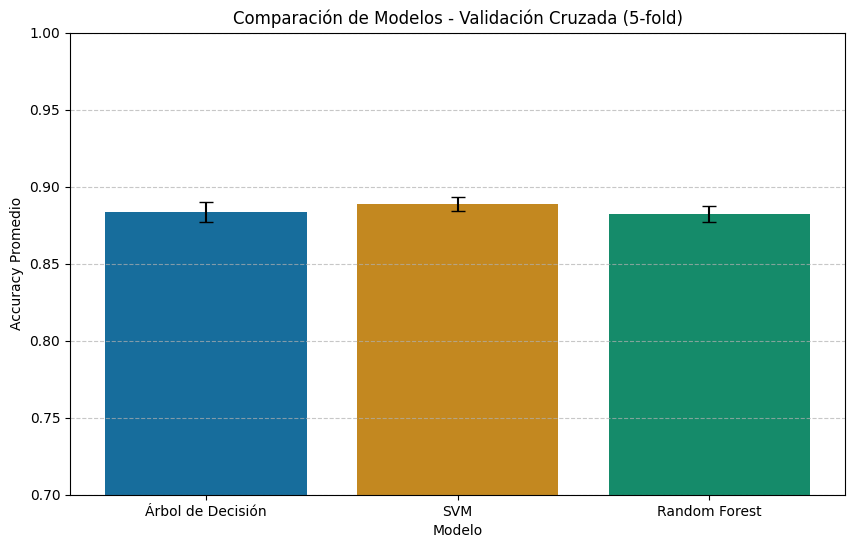

In [15]:
# 7. Comparación de modelos con validación cruzada
print("\n" + "="*50)
print("COMPARACIÓN DE MODELOS")
print("="*50)

models = {
    'Árbol de Decisión': DecisionTreeClassifier(max_depth=4, random_state=42),
    'SVM': SVC(kernel='rbf', C=10, gamma='scale', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Almacenar resultados
cv_results = []

for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    cv_results.append({
        'Modelo': name,
        'Accuracy Promedio': scores.mean(),
        'Desviación Estándar': scores.std(),
        'Scores': scores
    })

# Visualización de resultados de validación cruzada
cv_df = pd.DataFrame(cv_results)[['Modelo', 'Accuracy Promedio', 'Desviación Estándar']]
print("\nResumen de validación cruzada:")
print(cv_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Modelo', y='Accuracy Promedio', data=cv_df, palette='colorblind')
plt.errorbar(x=range(len(cv_df)), y=cv_df['Accuracy Promedio'],
             yerr=cv_df['Desviación Estándar'], fmt='none', color='black', capsize=5)
plt.title('Comparación de Modelos - Validación Cruzada (5-fold)')
plt.ylim(0.7, 1.0)  # Ajustar según los resultados
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('cross_validation_comparison.png')
plt.show()

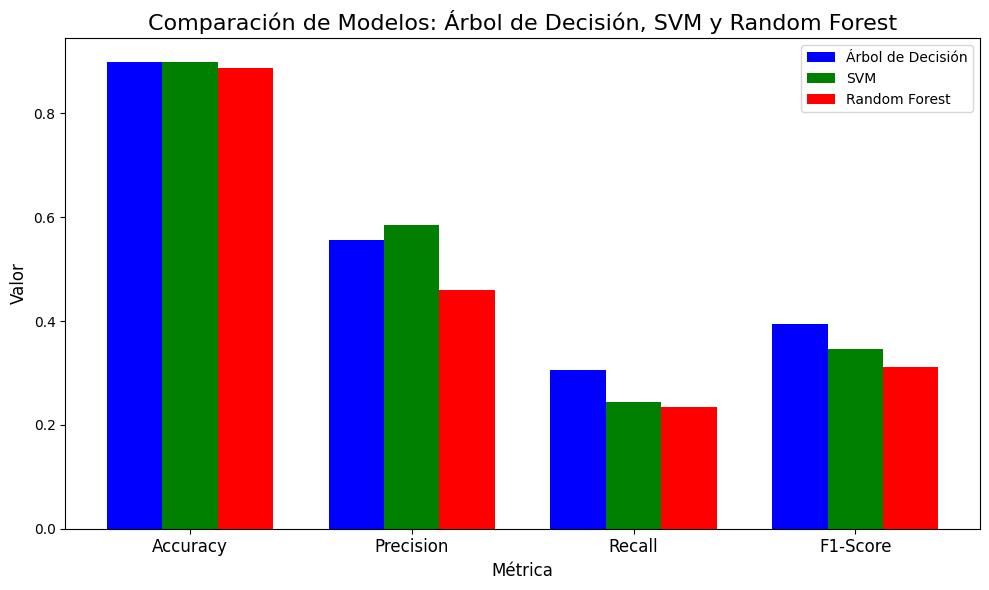

In [16]:
# Comparar las métricas para los tres modelos
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
tree_scores = [
    accuracy_score(y_test, y_pred_tree),
    precision_score(y_test, y_pred_tree),
    recall_score(y_test, y_pred_tree),
    f1_score(y_test, y_pred_tree)
]

svm_scores = [
    accuracy_score(y_test, y_pred_svm),
    precision_score(y_test, y_pred_svm),
    recall_score(y_test, y_pred_svm),
    f1_score(y_test, y_pred_svm)
]

rf_scores = [
    accuracy_score(y_test, y_pred_rf),
    precision_score(y_test, y_pred_rf),
    recall_score(y_test, y_pred_rf),
    f1_score(y_test, y_pred_rf)
]

# Crear un gráfico de barras comparando las métricas de los tres modelos
x = range(len(metrics))  # Las posiciones de las métricas
width = 0.25  # El ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Crear las barras para los tres modelos
rects1 = ax.bar([i - width for i in x], tree_scores, width, label='Árbol de Decisión', color='blue')
rects2 = ax.bar(x, svm_scores, width, label='SVM', color='green')
rects3 = ax.bar([i + width for i in x], rf_scores, width, label='Random Forest', color='red')

# Añadir los títulos y etiquetas
ax.set_title('Comparación de Modelos: Árbol de Decisión, SVM y Random Forest', fontsize=16)
ax.set_xlabel('Métrica', fontsize=12)
ax.set_ylabel('Valor', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=12)
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()